# Sobre o notebook

Aproveite esse espaço para as atividades do curso de **Data Science: transformando variáveis para uma Regressão Linear** da Alura. Aqui você pode escrever e testar os códigos dos exercícios do **Mão na Massa** envolvendo os aprendizados de cada aula.

Sinta-se livre para adicionar mais células e ajustar da forma que você deseja!


Logo abaixo, temos a url onde está localizada a base que será utilizada neste projeto.
>**Atenção:** Esta base é diferente daquela que estamos utilizando nas aulas!

Observe abaixo os dados disponíveis em nossa base:

* **valor**: valor do aluguel da hospedagem para 2 diárias de até 4 pessoas em reais. Essa é a variável alvo que é o que se deseja prever de acordo com os atributos da propriedade;
* **area**: a área da hospedagem, medida em metros quadrados;
* **dist_praia**: distância da hospedagem até a praia mais próxima, em quilômetros;
* **dist_mercado**: distância da hospedagem até o mercado mais próximo, em quilômetros;
* **piscina**: variável binária que indica se a hospedagem possui ou não uma piscina. Pode ser representada como 1 para "sim" e 0 para "não".



In [ ]:
url_hospedagens = "https://raw.githubusercontent.com/alura-cursos/data-science-regressao-linear/main/dados/hospedagens.csv"

## **Aula 01 - Análises preliminares**

### Mão na Massa - Explorando os dados

---



#### **Lendo e Explorando os dados**

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv(url_hospedagens)
dados.head()

,valor,area,dist_praia,dist_mercado,piscina
0,4600.0,280,0.241,0.794,1
1,900.0,208,0.904,0.134,1
2,2550.0,170,0.060,0.423,1
3,550.0,100,2.883,0.525,0
4,2200.0,164,0.240,0.192,0


In [ ]:
# Verificando a quantidade de dados
dados.shape

(5000, 5)

In [ ]:
# Como estão os meus dados?
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   valor         5000 non-null   float64
 1   area          5000 non-null   int64  
 2   dist_praia    5000 non-null   float64
 3   dist_mercado  5000 non-null   float64
 4   piscina       5000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 195.4 KB


#### **Entendendo a relação dos dados**

In [ ]:
# Correlação entre todo os dados
corr = dados.corr().round(3)
corr

,valor,area,dist_praia,dist_mercado,piscina
valor,1.000,0.711,-0.367,-0.024,0.295
area,0.711,1.000,-0.283,-0.031,0.300
dist_praia,-0.367,-0.283,1.000,0.026,-0.323
dist_mercado,-0.024,-0.031,0.026,1.000,-0.005
piscina,0.295,0.300,-0.323,-0.005,1.000


In [ ]:
# Correlação do preço de venda
corr["valor"].to_frame()

,valor
valor,1.000
area,0.711
dist_praia,-0.367
dist_mercado,-0.024
piscina,0.295


> #### <strong><font color="#203f75" size= 6>Observações:</font></strong>

Adicione aqui suas hipóteses e interpretações dos dados!

#### **Regressão linear com uma variável independente**

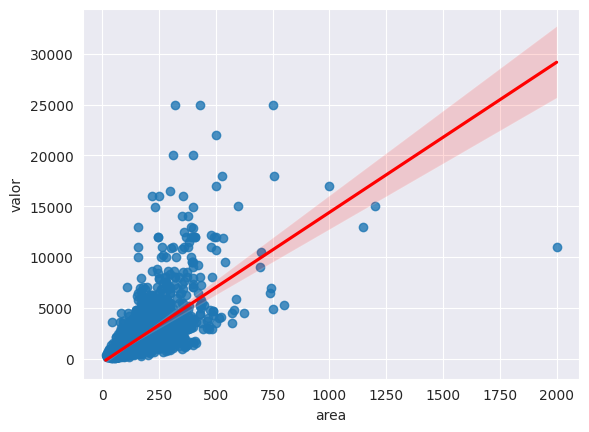

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
sns.regplot(x="area", y="valor", data=dados, line_kws={'color':'red'})
plt.show()

> #### <strong><font color="#203f75" size= 6>Observações:</font></strong>


Adicione aqui suas hipóteses e interpretações dos dados!

## **Aula 02 - Análises gráficas**

### Mão na Massa - Investigando o comportamento das variáveis

#### **Comportamento da variável dependente**

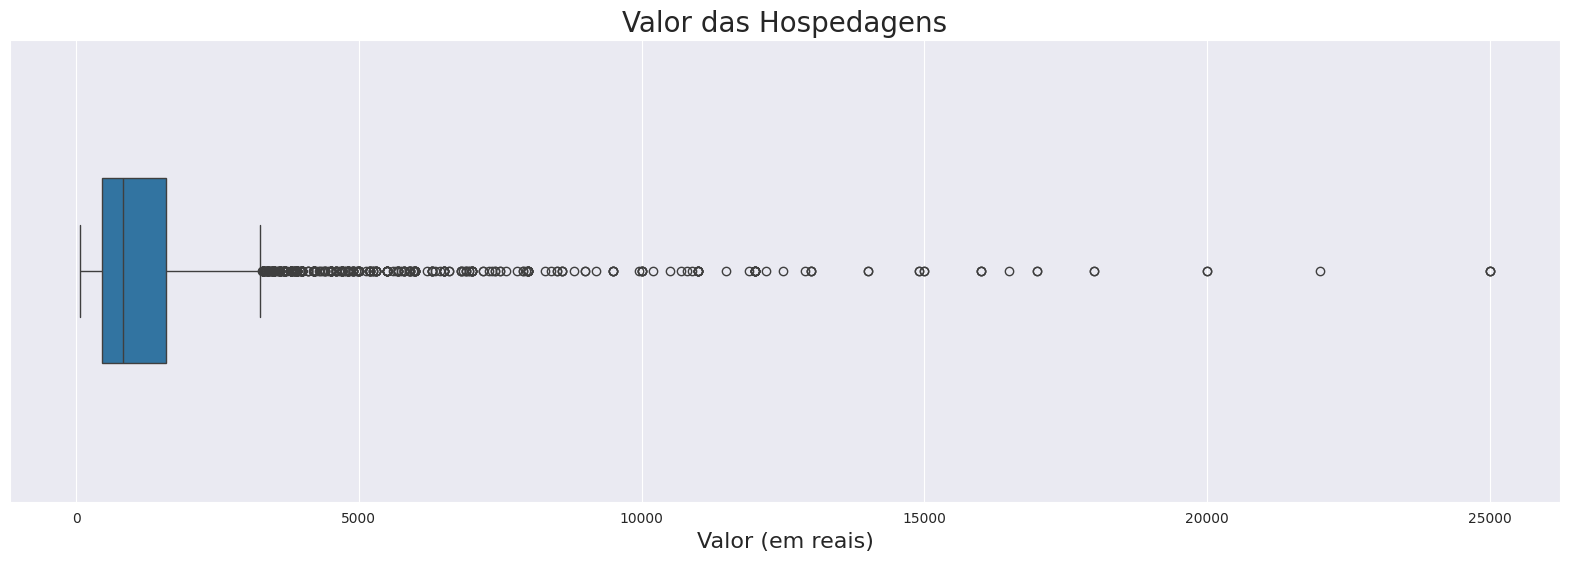

In [ ]:
ax = sns.boxplot(dados, x ="valor", width=0.4)

ax.figure.set_size_inches(20, 6)
ax.set_title('Valor das Hospedagens', fontsize=20)
ax.set_xlabel('Valor (em reais)', fontsize=16)
plt.show()

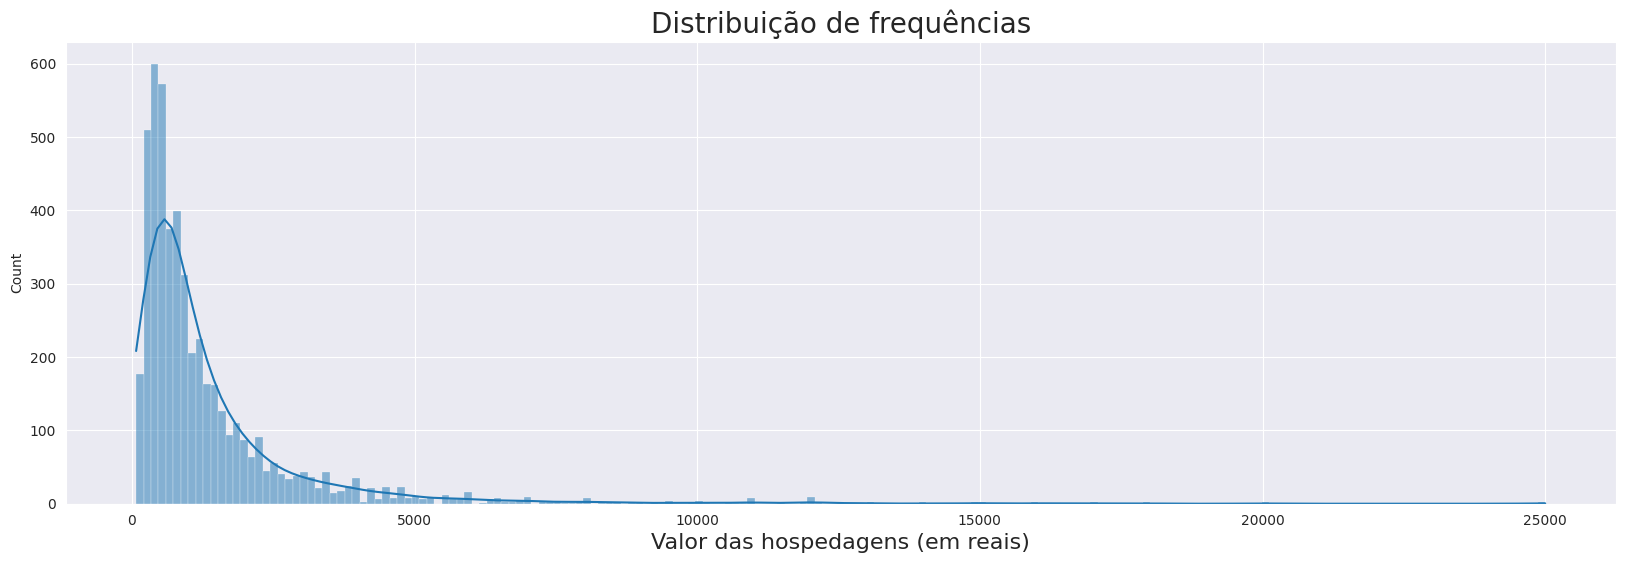

In [ ]:
ax = sns.histplot(dados['valor'], kde=True)

ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de frequências', fontsize=20)
ax.set_xlabel('Valor das hospedagens (em reais)', fontsize=16)
plt.show()

> #### <strong><font color="#203f75" size= 6>Observações:</font></strong>

Adicione aqui suas hipóteses e interpretações dos dados!

### **Análise das variáveis explicativas em relação ao valor**

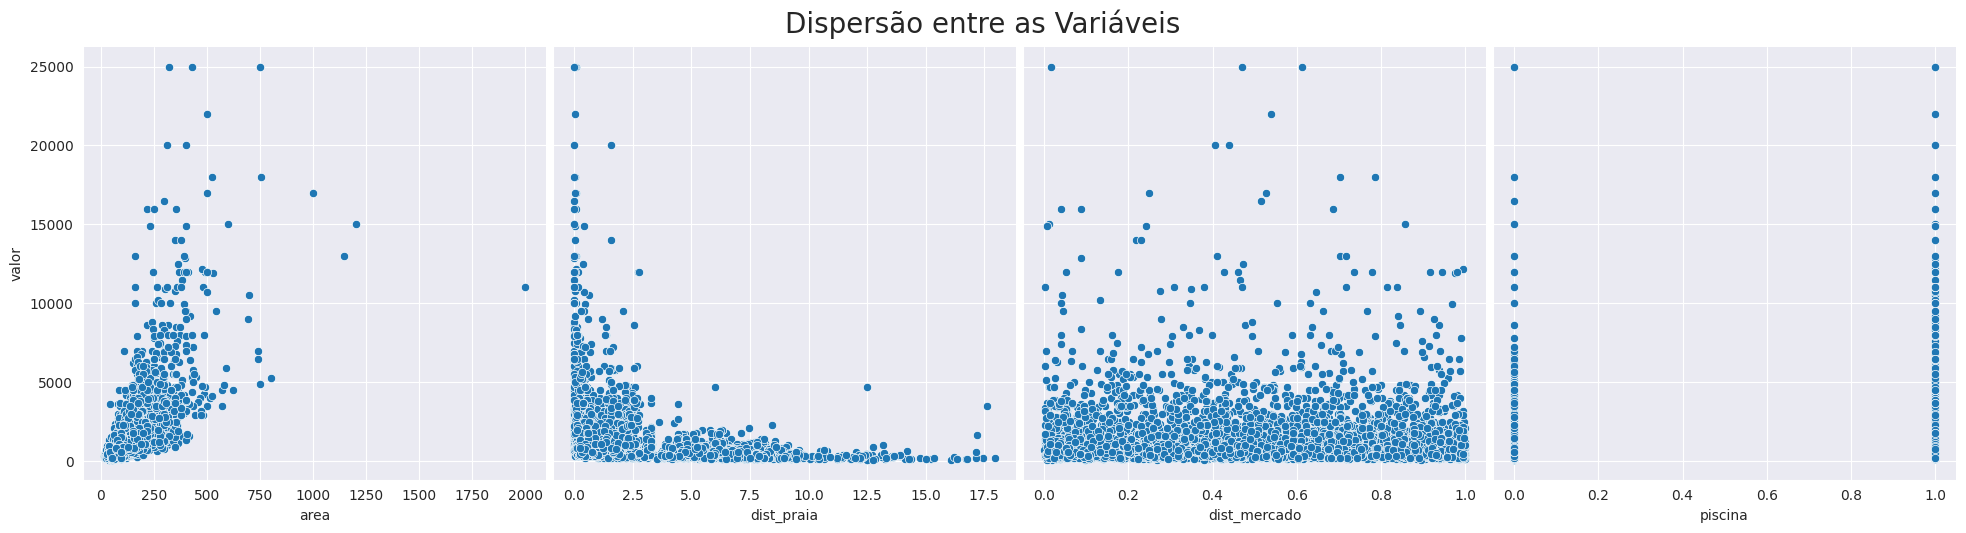

In [ ]:
# Pairplot sem reta de regressão
ax = sns.pairplot(dados, y_vars="valor", x_vars= ['area', 'dist_praia', 'dist_mercado', 'piscina'], height = 5)
ax.figure.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
plt.show()

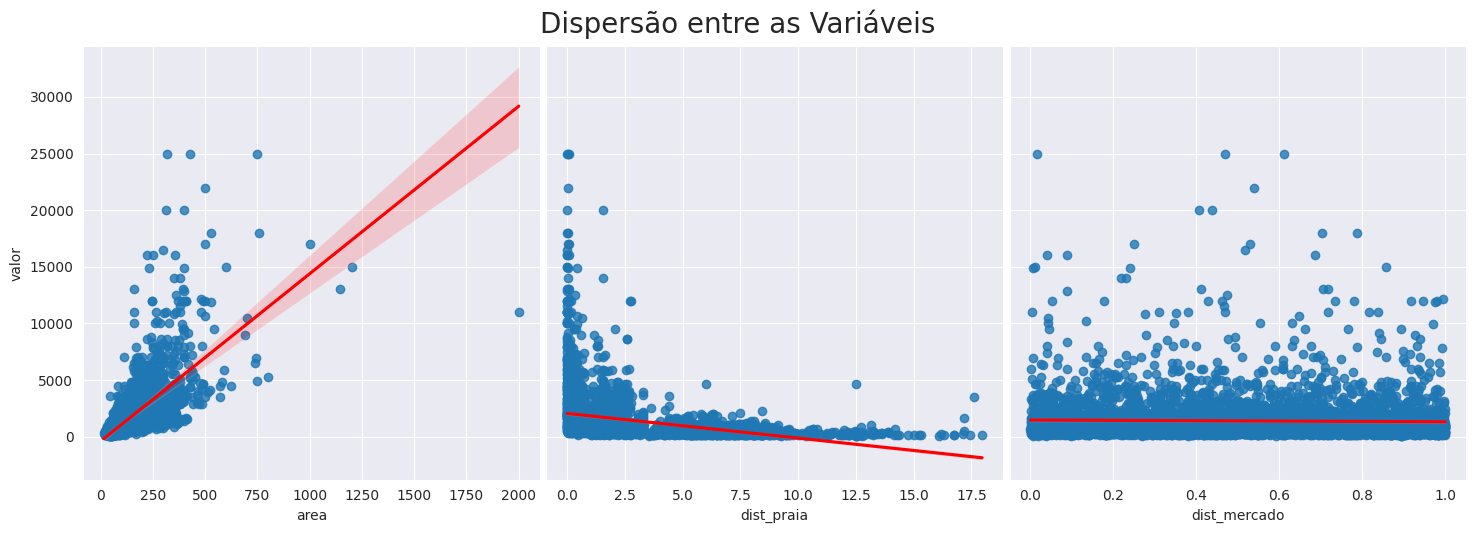

In [ ]:
# Pairplot com reta de regressão
ax = sns.pairplot(dados, y_vars="valor", x_vars= ['area', 'dist_praia', 'dist_mercado'], kind='reg',
                  plot_kws={'line_kws':{'color':'red'}}, height = 5)
ax.figure.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
plt.show()

> #### <strong><font color="#203f75" size= 6>Observações:</font></strong>

Adicione aqui suas hipóteses e interpretações dos dados!

## **Aula 03 - Transformação de variáveis**

### Mão na Massa - Transformando os dados e verificando suas relações

### **Transformando os dados**

In [ ]:
# Verificando se há 0 nas variáveis explicativas do nosso df
dados.describe().round(2)

,valor,area,dist_praia,dist_mercado,piscina
count,5000.00,5000.00,5000.00,5000.00,5000.00
mean,1402.93,121.94,3.02,0.50,0.51
std,1883.27,90.54,3.17,0.29,0.50
min,75.00,16.00,0.00,0.00,0.00
25%,460.00,70.00,0.44,0.24,0.00
50%,820.00,93.00,1.48,0.50,1.00
75%,1590.00,146.00,5.61,0.75,1.00
max,25000.00,2000.00,17.96,1.00,1.00


In [ ]:
# Transformando as variáveis explicativas e resposta utilizando o logaritmo
import numpy as np

dados['log_valor'] = np.log(dados['valor'])
dados['log_area'] = np.log(dados['area'])
dados['log_dist_praia'] = np.log1p(dados['dist_praia'])
dados['log_dist_mercado'] = np.log1p(dados['dist_mercado'])

In [ ]:
# Lendo os dados
dados.head(3)

,valor,area,dist_praia,dist_mercado,piscina,log_valor,log_area,log_dist_praia,log_dist_mercado
0,4600.0,280,0.241,0.794,1,8.433812,5.634790,0.215918,0.584448
1,900.0,208,0.904,0.134,1,6.802395,5.337538,0.643957,0.125751
2,2550.0,170,0.060,0.423,1,7.843849,5.135798,0.058269,0.352767


> #### <strong><font color="#203f75" size= 6>Observações:</font></strong>

Adicione aqui suas hipóteses e interpretações dos dados!

### **Distribuição de frequências da variável dependente transformada**

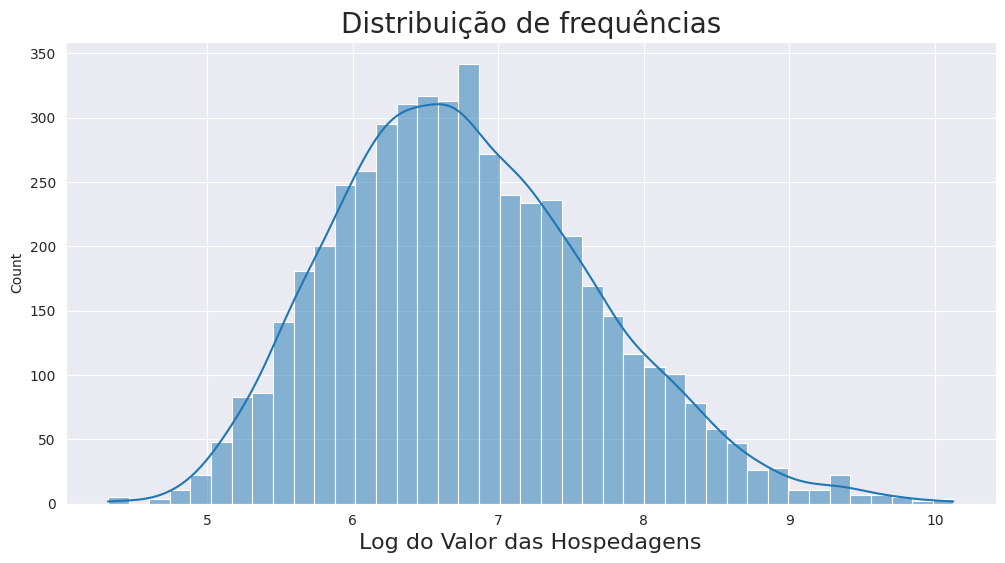

In [ ]:
ax = sns.histplot(dados['log_valor'], kde=True)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de frequências', fontsize=20)
ax.set_xlabel('Log do Valor das Hospedagens', fontsize=16)
plt.show()

> #### <strong><font color="#203f75" size= 6>Observações:</font></strong>

Adicione aqui suas hipóteses e interpretações dos dados!

### **Análise das variáveis explicativas transformadas em relação ao valor**

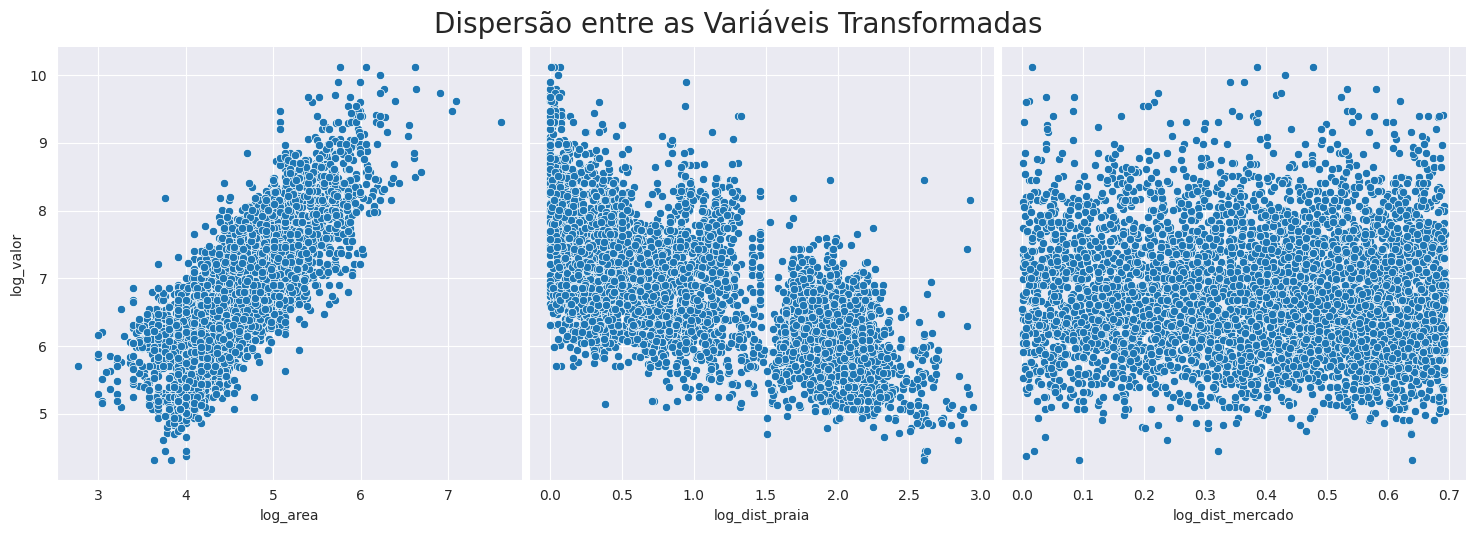

In [ ]:
ax = sns.pairplot(dados, y_vars="log_valor", x_vars= ['log_area', 'log_dist_praia', 'log_dist_mercado'], height = 5)
ax.figure.suptitle('Dispersão entre as Variáveis Transformadas', fontsize=20, y=1.05)
plt.show()

> #### <strong><font color="#203f75" size= 6>Observações:</font></strong>

Adicione aqui suas hipóteses e interpretações dos dados!

## **Aula 04 - Regressão linear múltipla**

### Mão na Massa - Preparando os dados e treinando o modelo

### **Dividindo os dados em treino e teste**

### **Estimando modelo de regressão linear e avaliando as estatísticas do modelo**

> #### <strong><font color="#203f75" size= 6>Observações:</font></strong>

Adicione aqui suas hipóteses e interpretações dos dados!

### **Treinando o modelo**

### **Precificando uma hospedagem**

<img src="https://github.com/alura-cursos/data-science-regressao-linear/blob/main/imagens/quanto_custa_slide_2.png?raw=true" alt="Imagem de uma casa e suas características para precificação" width=720>

## **Aula 05 - Entendendo os resultados**

### Mão na Massa - Interpretando os coeficientes do modelo e prevendo mais hospedagens

### **Obtendo o intercepto e coeficientes**

### **Interpretando os coeficientes**

**Intercepto →** Excluindo o efeito de todas as variáveis explicativas, o efeito médio no Valor da Hospedagem, seria de **R$ ???**. (exp[???])

**Área da hospedagem (m²)** → Mantendo-se os valores de todas as outras variáveis explicativas constantes, um acréscimo de 1% na Área da hospedagem gera, em média, um **acréscimo/decréscimo de ???** no Valor da Hospedagem.

**Distância até a praia (km)** → Mantendo-se os valores de todas as outras variáveis explicativas constantes, um acréscimo de 1% na Distância até a praia gera, em média, um **acréscimo/decréscimo de ???** no Valor da Hospedagem.



> #### <strong><font color="#203f75" size= 6>Observações:</font></strong>

Adicione aqui suas hipóteses e interpretações dos dados!

### **Analisando graficamente os resultados do modelo**

> #### <strong><font color="#203f75" size= 6>Observações:</font></strong>

Adicione aqui suas hipóteses e interpretações dos dados!

> #### <strong><font color="#203f75" size= 6>Observações:</font></strong>

Adicione aqui suas hipóteses e interpretações dos dados!

### **Aplicando o modelo para precificar mais hospedagens**

In [ ]:
# Hospedagens a precificar:
hospedagens = pd.DataFrame({
    'area': [460, 360, 220, 500, 150, 280, 460, 260, 300, 180],
    'dist_praia': [5.5, 2.0 , 4.0 , 1.5, 1.0 , 6.0 , 3.0 , 1.0 , 0.5, 6.0 ],
    'piscina': [1, 0, 0, 1, 0, 0, 1, 0, 0, 1] })
hospedagens

,area,dist_praia,piscina
0,460,5.5,1
1,360,2.0,0
2,220,4.0,0
3,500,1.5,1
4,150,1.0,0
5,280,6.0,0
6,460,3.0,1
7,260,1.0,0
8,300,0.5,0
9,180,6.0,1
